In [1]:
'''ooO 숫자 야구 게임 Ooo

    사용자에게서 3이상 9이하의 자릿수를 입력받고, 그 자릿수에 맞게 프로그램에서 랜덤으로 생성해낸 숫자를 추리하는 게임이다.
    이때, 생성되는 숫자는 중복되지 않는다.
    자릿수와 숫자 모두 맞추면 스트라이크, 자릿수는 틀렸지만 숫자는 맞는 경우 볼이다.
    모든 숫자를 자릿수에 맞게 맞추면 정답이다.
    
    자릿수 입력 란에 -1 입력 시 프로그램 종료된다.
    
'''

from graphics import *  # graphics 모듈을 임포트
import random  # random 모듈을 임포트

class Baseball:
    
    #매개변수 num으로 자릿수를 입력받고 생성된 랜덤 숫자를 변수self.ranNum에 할당하는 함수
    def __init__(self, num): 
        self.num = num  # 매개변수 num의 값을 인스턴스 변수 self.num에 저장
        self.ranNum = self.generate_random_number() # generate_random_number 메서드를 호출해 생성된 랜덤 숫자를 변수에 할당함
        
    
    #고유한 자릿수를 가진 숫자를 중복되지 않게 랜덤으로 생성하고, 생성된 숫자를 반환하는 함수
    def generate_random_number(self):
        testNum = []  # 랜덤 숫자를 저장할 리스트로 testNum 생성함
        ranNum = ''  # 변수 ranNum에 랜덤 숫자를 문자열로 저장함
        
        while len(testNum) < self.num:  # 입력받은 자릿수보다 testNum 리스트의 길이가 작을 시 반복됨 
            com = random.randint(1, 9)  # 1부터 9까지의 랜덤 숫자 생성해 변수 com에 할당함
            
            if com not in testNum:  # 리스트 testNum에 변수 com에 해당하는 숫자가 없으면, 즉 숫자가 중복되지 않으면
                testNum.append(com)  # 숫자 com을 testNum 리스트에 추가
                ranNum += str(com)  # 숫자 com을 문자열로 변환하여 변수 ranNum에 저장함
        return ranNum  # 생성된 랜덤 숫자 ranNum을 반환함
    
    
    #사용자가 입력한 추측값에 대해 스트라이크와 볼을 계산하고 반환하는 함수
    def guess_number(self, guess): #매개변수 guess로 추측값을 입력받음
        strike, ball = 0, 0  # 스트라이크와 볼의 초기값을 0으로 설정
        
        for i in range(self.num):  # 입력된 자릿수만큼 반복
            if guess[i] == self.ranNum[i]:  # 사용자가 추측한 값의 i번째 자릿수와 생성된 랜덤숫자의 i번째 자릿수가 동일하면
                strike += 1  # 스트라이크 1 증가
                
            elif guess[i] in self.ranNum:  # 사용자가 추측한 값의 i번째 자릿수가 생성된 랜덤숫자에 존재하지만 자릿수가 맞지 않으면
                ball += 1  # 볼 1 증가
        return strike, ball  # 스트라이크와 볼의 수를 튜플로 반환


#숫자 야구 게임을 그래픽과 함께 실행하는 메인 함수
def main():
    print("Let's play the game of numbers baseball.")  # 게임 시작 시 콘솔창에 메시지 출력

    # 그래픽 창 생성 및 설정
    win = GraphWin("야구볼 게임", 400, 300)  # 400x300 크기의 그래픽 창 생성
    win.setCoords(0.0, 0.0, 4.0, 4.0)  # 좌표 시스템 설정 (0.0, 0.0)에서 (4.0, 4.0)으로

    # 초기 화면에 필요한 요소들 생성
    text_input = Text(Point(0.9, 3), "자릿수 입력(3 이상) : ")  # 자릿수 입력 텍스트 생성
    text_input.draw(win)  # 그래픽 창에 그리기
    input_field = Entry(Point(2, 3), 9)  # 입력 필드 생성 (Entry 위젯의 시각적 너비 상 9자리까지 보임)
    input_field.setText("0")  # 초기 값을 "0"으로 설정
    input_field.draw(win)  # 그래픽 창에 그리기
    
    result_output = Text(Point(2, 2.3), "")  # 경고 메세지와 스트라이크 볼 개수를 출력하기 위한 텍스트 생성
    result_output.draw(win)  # 그래픽 창에 그리기
    
    message = Text(Point(2, 0.8), "-1 입력시 프로그램 종료됩니다")  # 프로그램 종료 안내 텍스트 생성
    message.draw(win)  # 그래픽 창에 그리기

    answer = Text(Point(3, 2), "")  # 정답 메시지 출력 위한 텍스트 생성
    answer.draw(win)  # 그래픽 창에 그리기
    
    gamestart = Text(Point(0.7, 2), "*\nLet's play\n the game of\n numbers baseball")  # 게임 시작 텍스트 생성
    gamestart.draw(win)  # 그래픽 창에 그리기
    
    # 랜덤 숫자 생성기 버튼
    button = Text(Point(2, 1.8), "랜덤 숫자 생성기")  # 버튼 텍스트 생성
    button.draw(win)  # 그래픽 창에 그리기
    Rectangle(Point(1.45, 1.5), Point(2.55, 2.1)).draw(win)  # 버튼 주위에 사각형 그려 버튼 모양을 만듦
    
    game = None  # 게임 객체 초기화
    
    while True:  # 무한 루프 시작
        click_point = win.getMouse()  # 사용자가 마우스 클릭한 위치 좌표 가져옴
        
        # 클릭한 위치가 "랜덤 숫자 생성기" 버튼의 영역 내에 있을 때
        if 1.45 <= click_point.getX() <= 2.55 and 1.5 <= click_point.getY() <= 2.1:  
            num_str = input_field.getText() #num_str 변수를 사용해 사용자 입력을 문자열로 가져옴
            print(f"Enter the num: {num_str}")  # 사용자가 입력한 자릿수를 콘솔에 출력
            
            try:
                num = int(num_str)  # 입력 필드에서 사용자가 입력한 값을 정수 num으로 변환
           
                if num == -1:  # 입력 값이 -1이면
                    print("Quit the game.") 
                    break  # 콘솔창에 종료 메시지 출력하고 프로그램 종료
                
                elif num < 3 or num >9:  # 입력 값이 3보다 작거나 9보다 크면
                    result_output.setText(f"3 ~ 9 자릿수를 입력하세요")  # 경고 메시지 그래픽창에 출력
                    print("Enter a number between 3 and 9 digits.\n") # 콘솔 창에 동일한 의미의 메시지 출력

                else:  # 입력 값이 유효하면
                    game = Baseball(num)  # 클래스 Baseball의 인스턴스 생성
                    result_output.setText("")  # 경고 메시지 그래픽 창에서 안 보이게 하기 위해 택스트 초기화함
                    text_input.setText("추측값 입력 : ")  # 자릿수 입력 텍스트에서 추측값 입력으로 텍스트 변경
                    button.setText("스트라이크-볼")  # "랜덤 숫자 생성기"에서 "스트라이크-볼"로 버튼 텍스트 변경
                    message.setText("")  # 프로그램 종료 안내 택스트 안 보이게 하기 위해 메시지 초기화함
                    answer.setText("")  # 정답 텍스트 안 보이게 하기 위해 텍스트 초기화
                    gamestart.setText("")  # 게임 시작 텍스트 초기화
                    
                    while True:  # 또 다른 무한 루프 시작
                        click_point = win.getMouse()  # 그래픽 창에서 마우스 클릭한 위치 좌표를 변수 click_point에 저장함
                        
                        if 1.45 <= click_point.getX() <= 2.55 and 1.5 <= click_point.getY() <= 2.1:  # 클릭한 위치가 버튼 영역 내에 있을 때
                            guess = input_field.getText()  # 입력 필드에서 사용자가 입력한 값을 변수 guess에 저장함
                            print(f"Enter the {game.num} digits(inputNum): {guess}") # 사용자가 입력한 추측값을 콘솔에 출력함 
                            # {game.num}은 게임에서 요구하는 숫자의 자릿수를 의미함
                            
                            #사용자가 입력한 값의 길이가 게임에서 요구하는 자릿수와 다르거나, 유효하지 않은 값을 입력한 경우
                            if len(guess) != game.num or not guess.isdigit(): 
                                result_output.setText(f"{game.num} 자리 숫자를 입력하세요.")  # 그래픽창에 경고 메시지 출력
                                continue # 반복문 처음으로 돌아가 추측값 재입력 받음
                            
                            strike, ball = game.guess_number(guess)  # 스트라이크와 볼 계산
                            result_output.setText(f"[결과] {strike} 스트라이크 {ball} 볼")  # 스트라이크 볼 개수 결과를 그래픽 창에 출력
                            print(f"[result] {strike} Strike {ball} Ball\n")  # 스트라이크 볼 개수 결과를 콘솔에 출력
                            
                            if strike == game.num:  # 정답을 맞추면, 즉 사용자가 입력한 숫자와 정답 숫자가 그 자릿수까지 모두 일치하면
                                break # 무한 루프 종료함
                            
                    # 정답을 맞췄을 때 초기 화면으로 돌아가기 위한 설정
                    answer.setText("정답!") #그래픽창에 "정답!" 표시
                    print("Congratulations, you got it!\n") #콘솔에 정답 메시지 출력함
                    
                    gamestart.setText("*\nLet's play\n the game of\n numbers baseball") #그래픽창에 게임 시작 문구 출력함
                    print("Let's play the game of numbers baseball.") #콘솔에 게임 시작 문구 출력함
                    
                    text_input.setText("자릿수 입력(3 이상) : ") #그래픽창에 입력 문구 출력함
                    input_field.setText("0") #입력 필드 값 0으로 설정함
                    
                    result_output.setText("") #그래픽 창에 스트라이크 볼 개수 결과 문구 안 보이게 하기 위해 텍스트 초기화함
                    button.setText("랜덤 숫자 생성기") #"스트라이크-볼"에서 "랜덤 숫자 생성기"로 버튼 텍스트 변경함
                    message.setText("-1 입력시 프로그램 종료됩니다") #그래픽창에 프로그램 종료 안내 문구 표시함
                    
                    
            except ValueError: #사용자가 자릿수 입력에서 정수가 아닌 값을 입력 시 발생하는 ValueError 예외를 처리함
                result_output.setText("잘못된 입력입니다.") #에러 메시지 그래픽창에 출력함
                print("Invalid input.\n")  # 에러 메시지를 콘솔에 출력
    
    win.close()  # 그래픽 창 닫기


main()  # 메인 함수 실행

Let's play the game of numbers baseball.
Enter the num: -1
Quit the game.


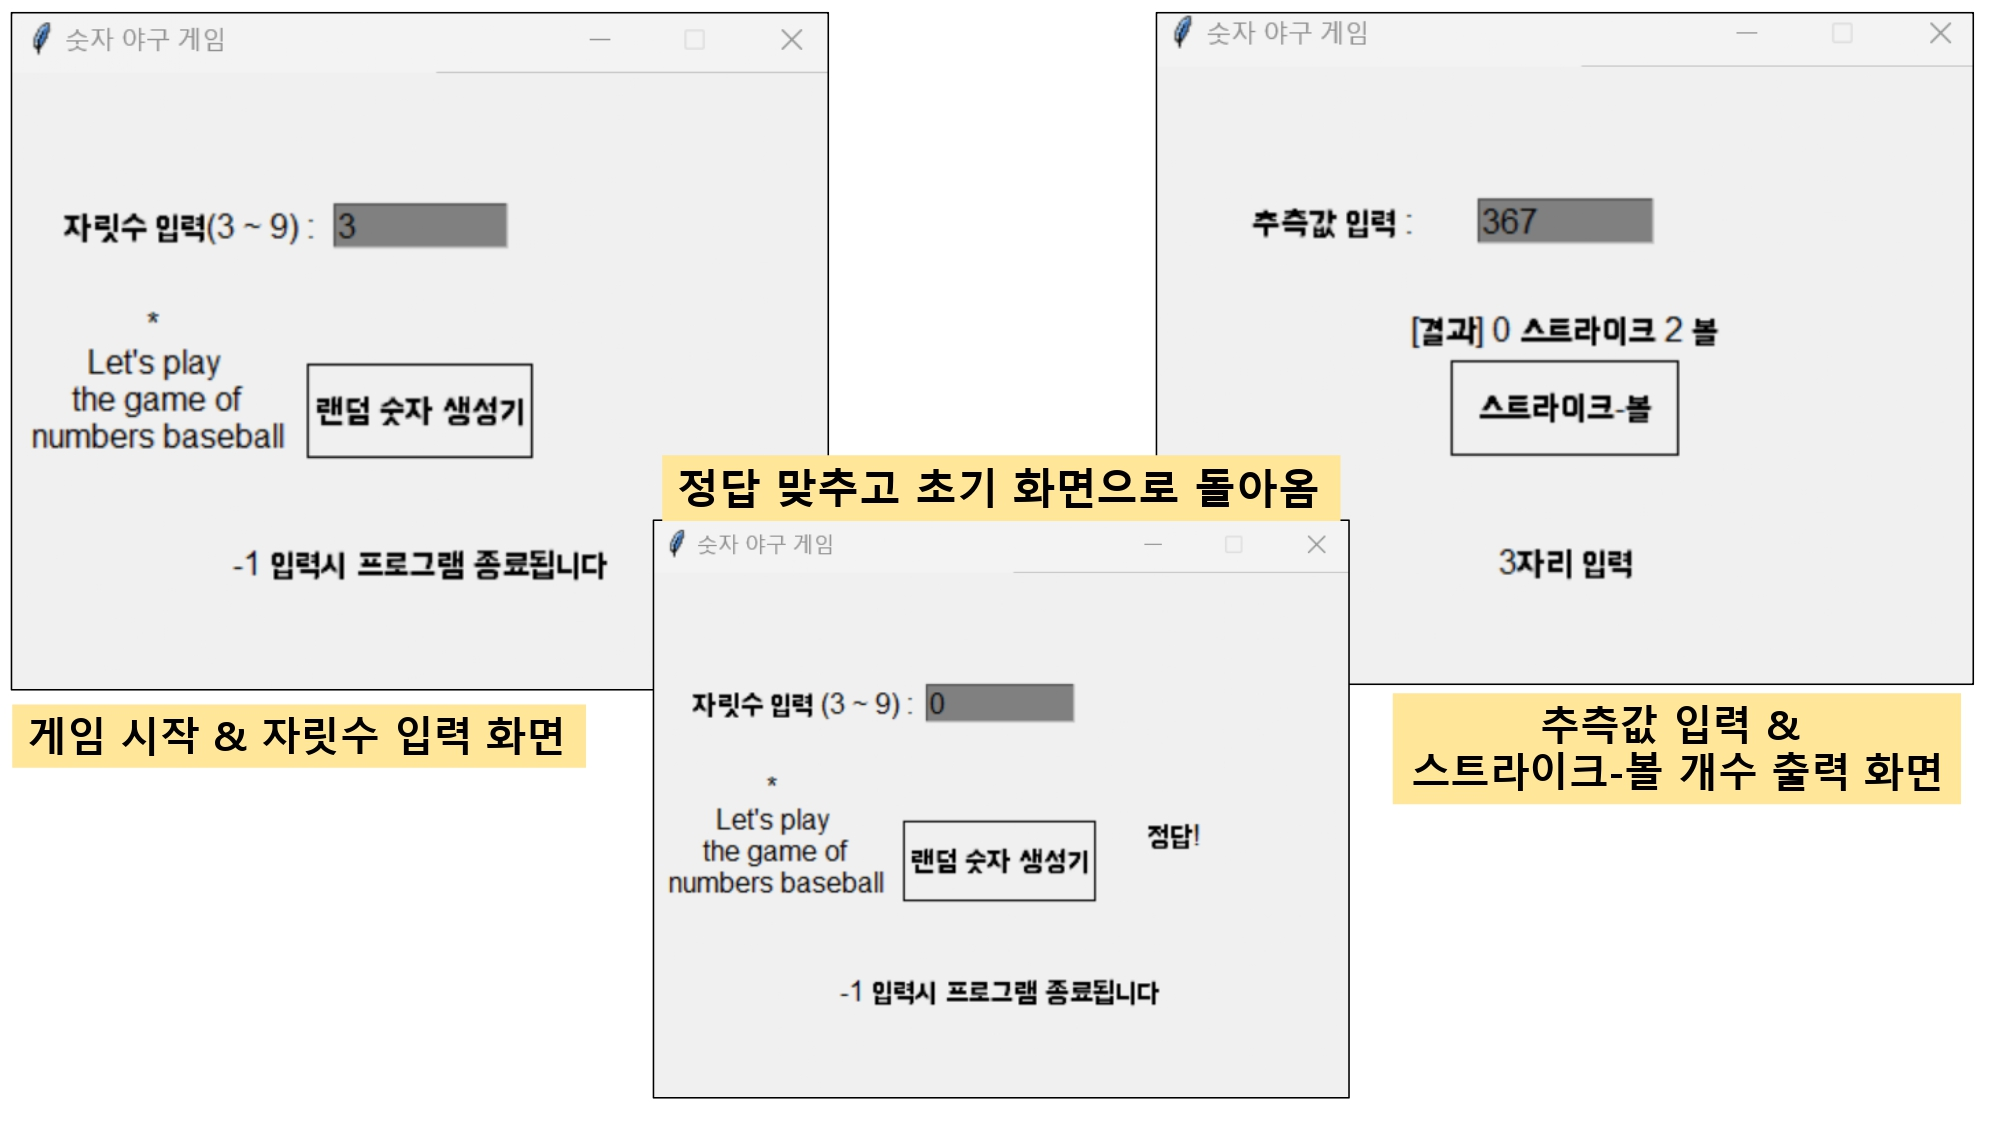

In [2]:
from IPython.display import Image
Image("1.jpg",width=2000,height=1125)